Install necessary library

In [ ]:
pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 5.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=486c7d479ea3a729f8a55c1d4141be43e33e2611f0cf53f948fb70321ea9b1a5
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


Import libraries

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control
import pandas as pd
from sklearn.metrics import mean_squared_error


Download data set 

In [ ]:
import requests 
file_url = "https://www.kaggle.com/sarita19/fuel-consumption/download"
	
r = requests.get(file_url, stream = True) 

with open("/content/dataset.csv", "wb") as file: 
	for block in r.iter_content(chunk_size = 1024): 
		if block: 
			file.write(block) 

Access to data set and show a few rows

In [ ]:
data = pd.read_csv("/content/dataset.csv")
data.head()

,3_levels,5_levels,7_levels,consumption,temperature,hour_of_day,day_of_week,day_of_month,month_of_year
0,1,1,1,0.255,-6.0,1,5,1,1
1,1,1,1,0.264,-6.9,2,5,1,1
2,1,1,1,0.253,-7.1,3,5,1,1
3,1,1,1,0.250,-7.2,4,5,1,1
4,1,1,1,0.234,-7.5,5,5,1,1


In [ ]:
data.describe()

,3_levels,5_levels,7_levels,consumption,temperature,hour_of_day,day_of_week,day_of_month,month_of_year
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,2.001480,3.001138,4.003415,0.671343,11.617281,12.500000,4.008197,15.756831,6.513661
std,0.817308,1.414616,2.000623,0.258330,10.309197,6.922581,1.998047,8.812031,3.451430
min,1.000000,1.000000,1.000000,0.174327,-21.800000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,0.395000,4.500000,6.750000,2.000000,8.000000,4.000000
50%,2.000000,3.000000,4.000000,0.740000,11.000000,12.500000,4.000000,16.000000,7.000000
75%,3.000000,4.000000,6.000000,0.844000,19.100000,18.250000,6.000000,23.000000,10.000000
max,3.000000,5.000000,7.000000,1.360000,36.500000,24.000000,7.000000,31.000000,12.000000


Set total range of variables

In [ ]:
Time = control.Antecedent(np.arange(1, 26, 1), 'Time')
Season = control.Antecedent(np.arange(1, 366, 1), 'Season')

In [ ]:
Consumption = control.Consequent(np.arange(0, 1.3600000, 0.01), 'Consumption')

Set range of membership functions ( Triangular )

In [ ]:
Time['early morning'] = fuzz.trimf(Time.universe, [1,1,8])
Time['morning'] = fuzz.trimf(Time.universe, [3,8,12])
Time['noon'] = fuzz.trimf(Time.universe, [8,12,15])
Time['afternoon'] = fuzz.trimf(Time.universe, [12,15,18])
Time['evening'] = fuzz.trimf(Time.universe, [15,18,20])
Time['night'] = fuzz.trimf(Time.universe, [18,20,24])
Time['midnight'] = fuzz.trimf(Time.universe, [20,25,25])

In [ ]:
Season['winter'] = fuzz.trimf(Season.universe, [1,1,136])
Season['spring'] = fuzz.trimf(Season.universe, [45,136,228])
Season['summer'] = fuzz.trimf(Season.universe, [136,228,319])
Season['autumn'] = fuzz.trimf(Season.universe, [228,366,366])

In [ ]:
Consumption['low'] = fuzz.trimf(Consumption.universe, [0,0,0.6713])
Consumption['middle'] = fuzz.trimf(Consumption.universe, [0.3356,0.6713,0.84])
Consumption['high'] = fuzz.trimf(Consumption.universe, [0.6713,0.84,1.01])
Consumption['very high'] = fuzz.trimf(Consumption.universe, [0.84,1.36,1.36])

Set range of membership functions ( Trapezoidal )

In [ ]:
Time['early morning'] = fuzz.trapmf(Time.universe, [0,0,4,8])
Time['morning'] = fuzz.trapmf(Time.universe, [3,7,9,12])
Time['noon'] = fuzz.trapmf(Time.universe, [8,11,13,15])
Time['afternoon'] = fuzz.trapmf(Time.universe, [12,14,16,18])
Time['evening'] = fuzz.trapmf(Time.universe, [15,17,19,20])
Time['night'] = fuzz.trapmf(Time.universe, [18,19.50,21,24])
Time['midnight'] = fuzz.trapmf(Time.universe, [20,24,25,26])

In [ ]:
Season['winter'] = fuzz.trapmf(Season.universe, [0,0,45,136])
Season['spring'] = fuzz.trapmf(Season.universe, [45,126,146,228])
Season['summer'] = fuzz.trapmf(Season.universe, [136,218,238,319])
Season['autumn'] = fuzz.trapmf(Season.universe, [228,319,365,365])

In [ ]:
Consumption['low'] = fuzz.trapmf(Consumption.universe, [0,0,0.3356,0.6713])
Consumption['middle'] = fuzz.trapmf(Consumption.universe, [0.3356,0.50,0.70,0.84])
Consumption['high'] = fuzz.trapmf(Consumption.universe, [0.6713,0.74,0.94,1.01])
Consumption['very high'] = fuzz.trapmf(Consumption.universe, [0.84,1.01,1.36,1.36])

Set range of membership functions ( Guassian )

In [ ]:
Time['early morning'] = fuzz.gaussmf(Time.universe, 1,2)
Time['morning'] = fuzz.gaussmf(Time.universe,8,2)
Time['noon'] = fuzz.gaussmf(Time.universe,12,2)
Time['afternoon'] = fuzz.gaussmf(Time.universe,15,2)
Time['evening'] = fuzz.gaussmf(Time.universe,18,2)
Time['night'] = fuzz.gaussmf(Time.universe,20,2)
Time['midnight'] = fuzz.gaussmf(Time.universe,25,2)

In [ ]:
Season['winter'] = fuzz.gaussmf(Season.universe, 1,30)
Season['spring'] = fuzz.gaussmf(Season.universe, 136,30)
Season['summer'] = fuzz.gaussmf(Season.universe, 228,30)
Season['autumn'] = fuzz.gaussmf(Season.universe, 366,30)

In [ ]:
Consumption['low'] = fuzz.gaussmf(Consumption.universe, 0,0.13)
Consumption['middle'] = fuzz.gaussmf(Consumption.universe, 0.6713,0.13)
Consumption['high'] = fuzz.gaussmf(Consumption.universe, 0.84,0.13)
Consumption['very high'] = fuzz.gaussmf(Consumption.universe, 1.36,0.13)

Set range of membership functions ( Combination )

In [ ]:
Time['early morning'] = fuzz.trapmf(Time.universe, [0,0,4,8])
Time['morning'] = fuzz.trimf(Time.universe, [3,8,12])
Time['noon'] = fuzz.trimf(Time.universe, [8,12,15])
Time['afternoon'] = fuzz.trimf(Time.universe, [12,15,18])
Time['evening'] = fuzz.trimf(Time.universe, [15,18,20])
Time['night'] = fuzz.trimf(Time.universe, [18,20,24])
Time['midnight'] = fuzz.trapmf(Time.universe, [20,24,25,25])

In [ ]:
Season['winter'] = fuzz.trapmf(Season.universe, [0,0,45,136])
Season['spring'] = fuzz.trimf(Season.universe, [45,136,228])
Season['summer'] = fuzz.trimf(Season.universe, [136,228,319])
Season['autumn'] = fuzz.trapmf(Season.universe, [228,319,366,366])

In [ ]:
Consumption['low'] = fuzz.trapmf(Consumption.universe, [0,0,0.3356,0.6713])
Consumption['middle'] = fuzz.trimf(Consumption.universe, [0.3356,0.6713,0.84])
Consumption['high'] = fuzz.trimf(Consumption.universe, [0.6713,0.84,1.01])
Consumption['very high'] = fuzz.trapmf(Consumption.universe, [0.84,1.01,1.36,1.36])

Chart of membership functions

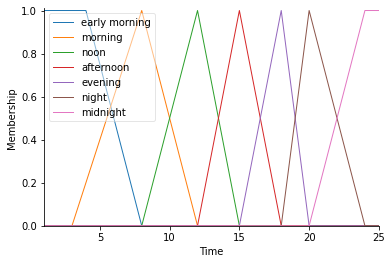

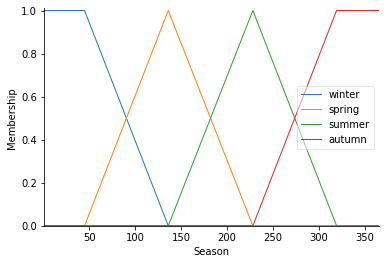

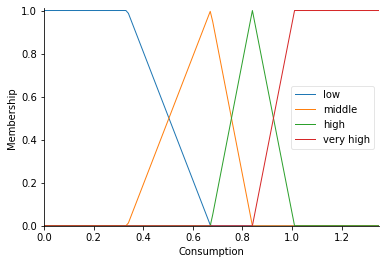

In [ ]:
Time.view()
Season.view()
Consumption.view()

Seperate seasons

In [ ]:
winter = []
spring = []
summer = []
autumn = []

for index, row in data.iterrows():
    if (row['month_of_year'] == 1 or row['month_of_year'] == 2 or row['month_of_year'] == 3 ):
      winter.append(row)
    if (row['month_of_year'] == 4 or row['month_of_year'] == 5 or row['month_of_year'] == 6 ):
      spring.append(row)
    if (row['month_of_year'] == 7 or row['month_of_year'] == 8 or row['month_of_year'] == 9 ):
      summer.append(row)
    if (row['month_of_year'] == 10 or row['month_of_year'] == 11 or row['month_of_year'] == 12 ):
      autumn.append(row)

winter = np.array(winter)
spring = np.array(spring)
summer = np.array(summer)
autumn = np.array(autumn)

Winter conusmption based on time

([<matplotlib.axis.XTick at 0x7f4b89c6a750>,
 <a list of 26 Text major ticklabel objects>)

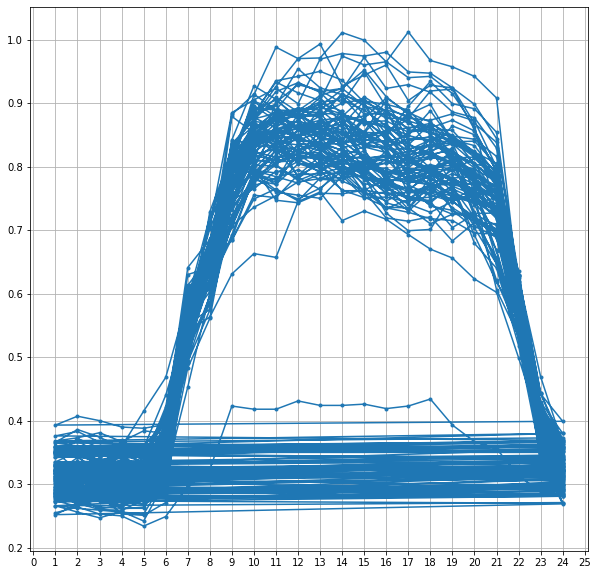

In [ ]:
plt.plot( winter[0::,5],winter[0::,3] , '.-')
plt.rcParams["figure.figsize"] = (10,10)
plt.grid(True)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])

Rules of winter

early morning and winter => low

morning and winter => middle

nooon and winter => high

afternoon and winter => high

evening and winter => high

night and winter => high

midnight and winter => low


Spring conusmption based on time

([<matplotlib.axis.XTick at 0x7f4b89c082d0>,
 <a list of 26 Text major ticklabel objects>)

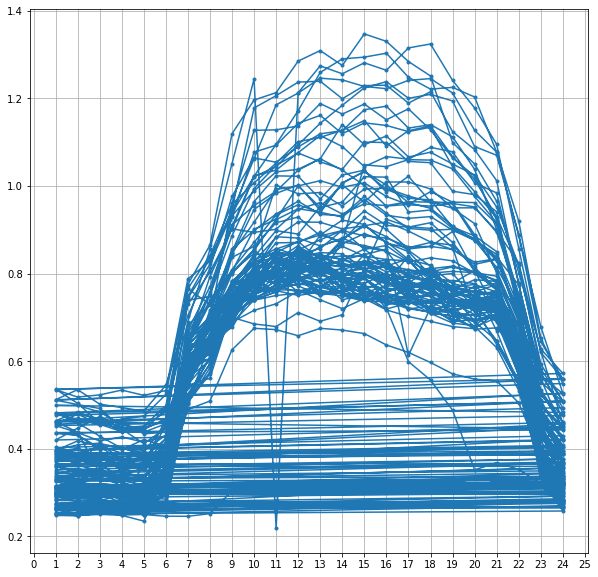

In [ ]:
plt.plot( spring[0::,5],spring[0::,3] , '.-')
plt.rcParams["figure.figsize"] = (10,10)
plt.grid(True)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])

Rules of spring

early morning and spring => low

morning and spring => middle

nooon and spring => high

afternoon and spring => high

evening and spring => high

night and spring => middle

midnight and spring => low

Summer conusmption based on time

([<matplotlib.axis.XTick at 0x7f4b88acae50>,
 <a list of 26 Text major ticklabel objects>)

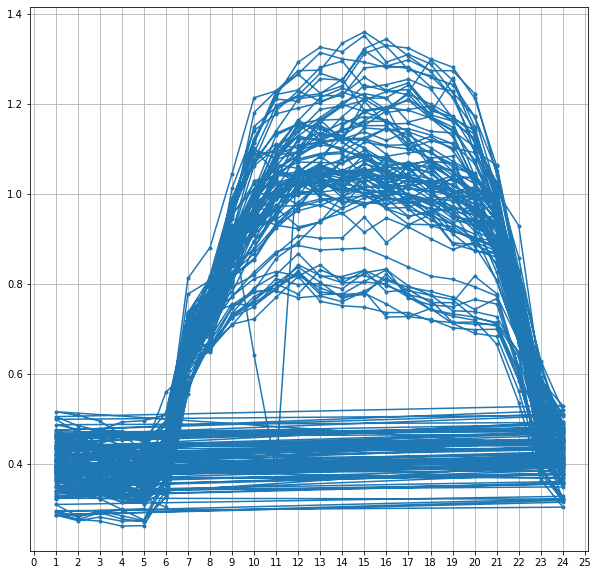

In [ ]:
plt.plot( summer[0::,5],summer[0::,3] , '.-')
plt.rcParams["figure.figsize"] = (10,10)
plt.grid(True)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])

Rules of summer

early morning and summer => low

morning and summer => middle

nooon and summer => very high

afternoon and summer => very high

evening and summer => very high

night and summer => very high

midnight and summer => low

autumn conusmption based on time

([<matplotlib.axis.XTick at 0x7f4b88b4e8d0>,
 <a list of 26 Text major ticklabel objects>)

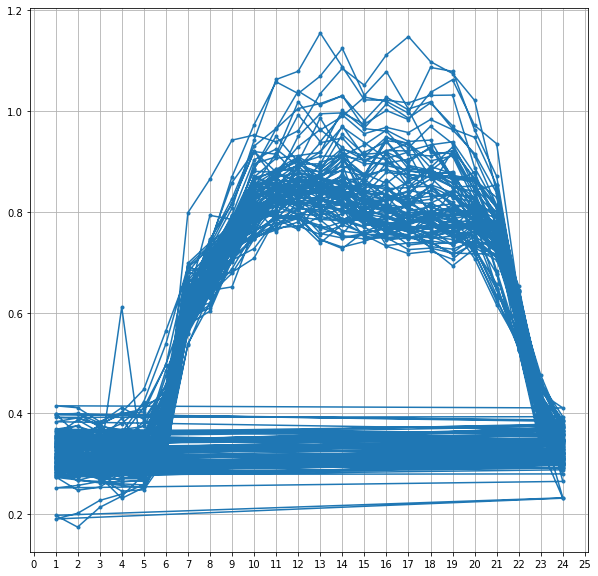

In [ ]:
plt.plot( autumn[0::,5],autumn[0::,3] , '.-')
plt.rcParams["figure.figsize"] = (10,10)
plt.grid(True)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])

Rules of autumn

early morning and autumn => low

morning and autumn => middle

nooon and autumn => high

afternoon and autumn => high

evening and autumn => high

night and autumn => high

midnight and autumn => low

Rules of winter

In [ ]:
w1 = control.Rule(Time['early morning'] & Season['winter'], Consumption['low'])
w2 = control.Rule(Time['morning'] & Season['winter'], Consumption['middle'])
w3 = control.Rule(Time['noon'] & Season['winter'], Consumption['high'])
w4 = control.Rule(Time['afternoon'] & Season['winter'], Consumption['high'])
w5 = control.Rule(Time['evening'] & Season['winter'], Consumption['high'])
w6 = control.Rule(Time['night'] & Season['winter'], Consumption['high'])
w7 = control.Rule(Time['midnight'] & Season['winter'], Consumption['low'])

Rules of spring

In [ ]:
s1 = control.Rule(Time['early morning'] & Season['spring'], Consumption['low'])
s2 = control.Rule(Time['morning'] & Season['spring'], Consumption['middle'])
s3 = control.Rule(Time['noon'] & Season['spring'], Consumption['high'])
s4 = control.Rule(Time['afternoon'] & Season['spring'], Consumption['high'])
s5 = control.Rule(Time['evening'] & Season['spring'], Consumption['high'])
s6 = control.Rule(Time['night'] & Season['spring'], Consumption['middle'])
s7 = control.Rule(Time['midnight'] & Season['spring'], Consumption['low'])

Rules of summer

In [ ]:
su1 = control.Rule(Time['early morning'] & Season['summer'], Consumption['low'])
su2 = control.Rule(Time['morning'] & Season['summer'], Consumption['middle'])
su3 = control.Rule(Time['noon'] & Season['summer'], Consumption['very high'])
su4 = control.Rule(Time['afternoon'] & Season['summer'], Consumption['very high'])
su5 = control.Rule(Time['evening'] & Season['summer'], Consumption['very high'])
su6 = control.Rule(Time['night'] & Season['summer'], Consumption['very high'])
su7 = control.Rule(Time['midnight'] & Season['summer'], Consumption['low'])

Rules of autumn

In [ ]:
au1 = control.Rule(Time['early morning'] & Season['autumn'], Consumption['low'])
au2 = control.Rule(Time['morning'] & Season['autumn'], Consumption['middle'])
au3 = control.Rule(Time['noon'] & Season['autumn'], Consumption['high'])
au4 = control.Rule(Time['afternoon'] & Season['autumn'], Consumption['high'])
au5 = control.Rule(Time['evening'] & Season['autumn'], Consumption['high'])
au6 = control.Rule(Time['night'] & Season['autumn'], Consumption['high'])
au7 = control.Rule(Time['midnight'] & Season['autumn'], Consumption['low'])

Give Rules to model and make it

In [ ]:
consumption_controler = control.ControlSystem([w1,w2,w3,w4,w5,w6,w7,s1,s2,s3,s4,s5,s6,s7,su1,su2,su3,su4,su5,su6,su7,au1,au2,au3,au4,au5,au6,au7])

In [ ]:
system = control.ControlSystemSimulation(consumption_controler)

Prediction

Prediction for a special input and show Defuzzification

In [ ]:
system.input['Time'] = 10
system.input['Season'] = 200

system.compute()

system.output

OrderedDict([('Consumption', 0.8860748609575972)])

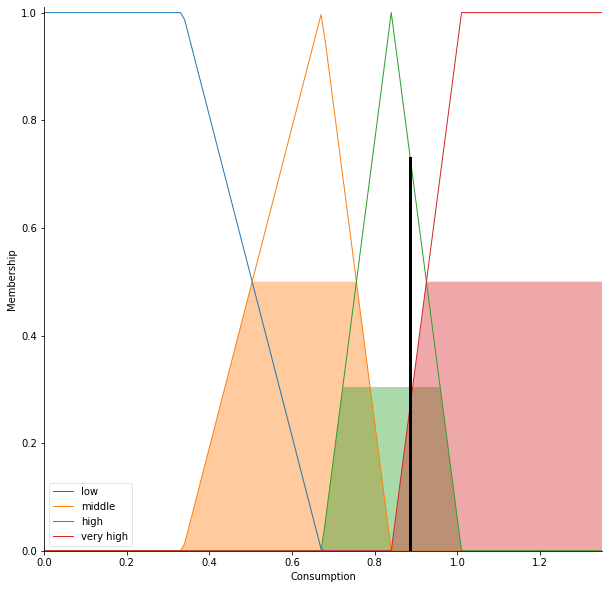

In [ ]:
Consumption.view(sim=system)

Add A Column for days of year to dataset 

In [ ]:
days = [ i for i in range(1,367)]
days = np.array(days)
days = np.repeat(days,24)
data['day_of_year'] = days

Functions to reach real values from data set

In [ ]:
def Realvalue(time, season):
  for index, row in data.iterrows():
    if(row['hour_of_day'] == time and row['day_of_year'] == season):
      return row["consumption"]


Functions to predict consumption

In [ ]:
def Predcition(time, season):
  system.input['Time'] = time
  system.input['Season'] = season
  system.compute()
  return system.output["Consumption"]

Final function to count MSE ( mean of square error ) for all data

In [ ]:
predicted_value = []
real_value = []

def Counterror():
  for index, row in data.iterrows():
    predict = Predcition(row["hour_of_day"], row['day_of_year'])
    real = Realvalue(row["hour_of_day"], row['day_of_year'])
    predicted_value.append(predict)
    real_value.append(real)
  mse = mean_squared_error(real_value, predicted_value, squared=False)
  print(mse)
    

Counterror()


0.11094301381874855
